In [83]:
import os #importing os module enables to interact with the operating system tasks
import keras #importing keras for its functions
import numpy as np ##importing numpy for mathematical operations
import pandas as pd #importing pandas for data processing
from tensorflow.keras.applications.resnet50 import ResNet50 # importing resnet50 model
from tensorflow.keras.preprocessing import image #Utilies for image preprocessing and augmentation.
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions 
#decode_predictions:Decodes the prediction of an ImageNet model.
# preprocess_input: Preprocesses a tensor or Numpy array encoding a batch of images

In [84]:
model = ResNet50(weights='imagenet')
#loading resnet50 model 

In [85]:
import matplotlib.pyplot as plt
##importing matplotlib for ploting the data

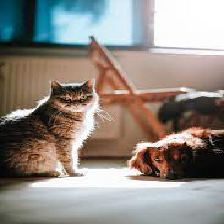

In [86]:
img_path = '/content/drive/MyDrive/check1.jpeg' # image to check 
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224)) #loading image and preprocessing to required size
display(img)


In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
 #Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

In [89]:
#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)

1/1 [==============================] - 2s 2s/step


In [90]:
p # all possible predictions with their weights

[[('n02094258', 'Norwich_terrier', 0.6142239),
  ('n02123045', 'tabby', 0.05852936),
  ('n02096294', 'Australian_terrier', 0.056631733),
  ('n02124075', 'Egyptian_cat', 0.051594034),
  ('n02123159', 'tiger_cat', 0.017525792)]]

In [ ]:
!pip install lime
#installing lime 

In [92]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
explainer = lime_image.LimeImageExplainer() 
#Explains predictions on Image (i.e. matrix) data. For numerical features, perturb them by sampling from a Normal(0,1) and doing the inverse operation of mean-centering and scaling, according to the means and stds in the training data.

In [ ]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(x[0].astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=1000)


In [95]:
explanation

In [96]:
from skimage.segmentation import mark_boundaries
#Return image with boundaries between labeled regions highlighted.

# Explaination For Norwich_terrier

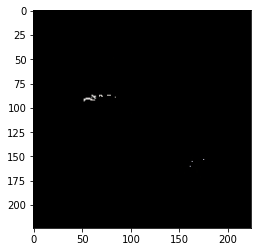

In [97]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask).astype("uint8"))  
#positive_only :if True, only take superpixels that positively contribute to the prediction of the label.
#hide_rest – if True, make the non-explanation part of the return image gray
#num_features – number of superpixels to include in explanation
#min_weight – minimum weight of the superpixels to include in explanation

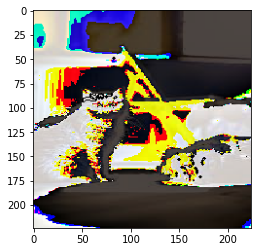

In [98]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask).astype("uint8"))

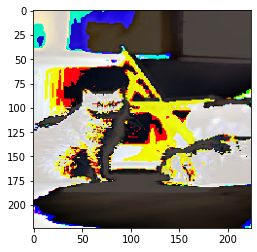

In [99]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask).astype("uint8"))

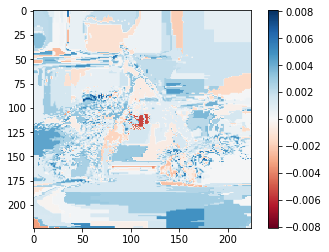

In [100]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot:The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()
     

# PREDICTIONS FOR TABBY (2ND HIGHEST)

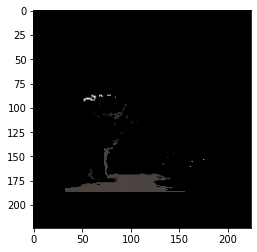

In [105]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[-1], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask).astype("uint8"))  

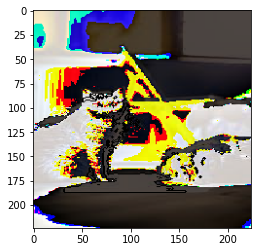

In [106]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[-1], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask).astype("uint8"))

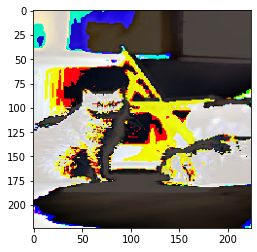

In [107]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[-1], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask).astype("uint8"))

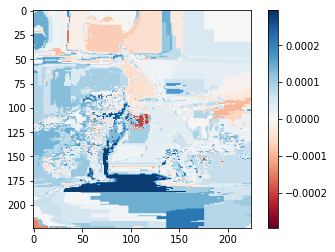

In [108]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[-1]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot:The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()
     